In [120]:
%matplotlib inline

In [121]:
#import libraries
import sys
import os
import json
import pandas as pd
import numpy as np
import scipy
import string
from scrapbook.api import glue
working_dir = %pwd

from interpret_text.bow.BOWExplainer import BOWExplainer
#from interpret_text.common.utils_bow import BOWTokenizer, BOWEncoder

# sklearn
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# spacy and nlp recipes
import spacy
from spacy.lang.en import English
from utils_nlp.dataset.multinli import load_pandas_df

In [122]:
#SPACY_LANG_MODEL = 'en_core_web_md'
DATA_FOLDER = './prod_training_data/'
TRAIN_SIZE = 0.7
TEST_SIZE = 0.3

In [123]:
suffix = "_labeled_feedback.txt"
explainer_dict = {filename[:-1*len(suffix)]:{"explainer":None, "filename":filename} for filename in os.listdir(DATA_FOLDER)}

In [126]:
for category in explainer_dict:
    filename = explainer_dict[category]["filename"]
    df_reach = pd.read_csv(DATA_FOLDER+filename, sep="\t")

    # fetch documents and labels from data frame
    X_str = df['verbatim'] # the document we want to analyze
    ylabels = df['cannot_reach_page'].apply(str) # the labels, or answers, we want to test against converted to strings
    # Create explainer object that contains defaault glassbox classfier and explanation methods
    bow_explainer = BOWExplainer()
    # encode document and labels into vector form using 1-gram Bag of Words.
    X_train, X_test, y_train, y_test = bow_explainer.encode(X_str,ylabels)
    classifier, best_params = bow_explainer.train(X_train,y_train)
    # obtain best classifier and hyper params
    print("best classifier for {}: ".format(category) + str(best_params))
    mean_accuracy = classifier.score(X_test, y_test, sample_weight=None)
    print("accuracy for {}= ".format(category) + str(mean_accuracy*100) + "%")
    y_pred = classifier.predict(X_test)
    [precision, recall, fscore, support] = precision_recall_fscore_support(y_test, y_pred,average='macro')
    explainer_dict[category]["explainer"] = bow_explainer
    

C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.11758211426994%
best classifier for cannot_reach_page: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for cannot_reach_page= 89.73509933774835%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.68341153739995%
best classifier for default_gateway: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for default_gateway= 88.57615894039735%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.61440794921336%
best classifier for dns_not_working_responding: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for dns_not_working_responding= 89.40397350993378%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.78001656086116%
best classifier for hotspot_issue: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for hotspot_issue= 88.46578366445917%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.18658570245653%
best classifier for printer_cannot_connect: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for printer_cannot_connect= 88.57615894039735%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.75241512558652%
best classifier for printer_not_working: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for printer_not_working= 88.35540838852097%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.5730057963014%
best classifier for printer_offline: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for printer_offline= 88.52097130242825%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.94562517250897%
best classifier for vpn_issue: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for vpn_issue= 87.52759381898456%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.66961081976262%
best classifier for wifi_disconnecting: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for wifi_disconnecting= 88.0242825607064%


C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


mean_accuracy = 88.50400220811481%
best classifier for wifi_not_working: {'C': 10000, 'multi_class': 'multinomial', 'solver': 'saga'}
accuracy for wifi_not_working= 89.79028697571744%


The class names are as follows
['0.0' '1.0']
[[-4.65789490e-03 -3.90352504e-03 -1.97804856e-02 ... -1.18595224e-02
  -1.18595224e-02 -1.91013196e-05]]
[0]


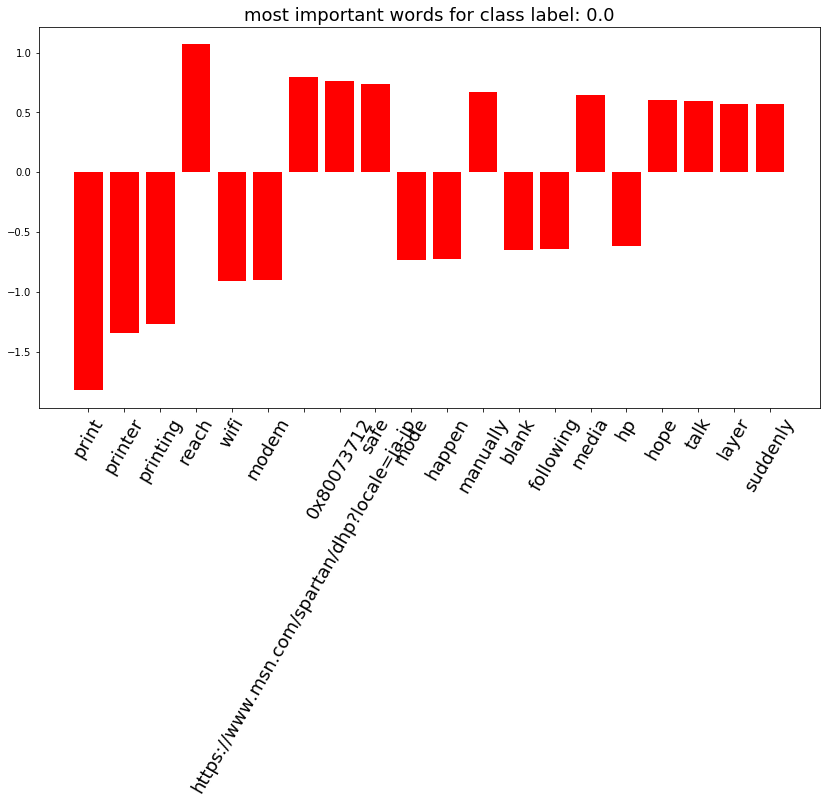

In [128]:
bow_explainer = explainer_dict["cannot_reach_page"]["explainer"]
# bow_explainer = explainer_dict["vpn_issue"]["explainer"]
print("The class names are as follows")
print(bow_explainer.preprocessor.labelEncoder.classes_)
label_name = "0.0"

#Obtain the top feature ids for the selected class label.           
#Map top features back to words.
top_words, top_importances = bow_explainer.explain_global(label_name)

In [118]:
#Enter any document & label pair that needs to be interpreted
document = "Can't reach this page https://webmail.optusnet.com.au/index.php/mail | Can not connect to Optus Web Mail."
document = "my computer keeps saying that I am not connected and I have to keep refreshing."
document = "I CANT GET ON THE INTERNET WITH MY DONGLE CAN YOU HELP PLEASE..  | I AM IN A RESPITE HOME THAT DOESN`T HAVE A INTERNET CONNECTION I WAS TOLD TO USE A DONGLE AND I DID THIS AND IT HAS WORKED IN THE PAST CAN YOU HELP ME GET ON PLEAE THANK YOU."

#Obtain the top feature ids for the selected class label
word_importances, parsed_sentence = bow_explainer.explain_local(document, model=None)

C:\Users\abchhetr\AppData\Local\Continuum\anaconda3\envs\interpret-text\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
bow_explainer.visualize(word_importances, parsed_sentence)